In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import seaborn as sns

# suppress warning
import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf

#import seaborn as sns
#sns.set()

%matplotlib inline



In [14]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.9 MB/s eta 0:00:00


In [5]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [6]:
cd drive/MyDrive/DS24spring-Final-Project/

/content/drive/MyDrive/DS24spring-Final-Project


## Data Cleaning

In [7]:
# Get the current directory
current_directory = os.getcwd()

# Define the path to the data folder
data_folder = os.path.join(current_directory, 'Data')

# List all files in the data folder
files = os.listdir(data_folder)


# Read each CSV file in the data folder
for file in files:
    if file.endswith('listings2024_03.csv'):
        print("df2024_03")
        file_path1 = os.path.join(data_folder, file)
        df2024_03 = pd.read_csv(file_path1)
    elif file.endswith('listings2024_02.csv'):
        print("df2024_02")
        file_path2 = os.path.join(data_folder, file)
        df2024_02 = pd.read_csv(file_path2)
    elif file.endswith("listings2024_01.csv"):
        print("df2024_01")
        file_path3 = os.path.join(data_folder, file)
        df2024_01 = pd.read_csv(file_path3)
    elif file.endswith("listings2023_12.csv"):
        print("df2023_12")
        file_path4 = os.path.join(data_folder, file)
        df2023_12 = pd.read_csv(file_path4)
    elif file.endswith("listings2023_11.csv"):
        print("df2023_11")
        file_path5 = os.path.join(data_folder, file)
        df2023_11 = pd.read_csv(file_path5)
    elif file.endswith("listings2023_10.csv"):
        print("df2023_10")
        file_path6 = os.path.join(data_folder, file)
        df2023_10 = pd.read_csv(file_path6)
    elif file.endswith("listings2023_09.csv"):
        print("df2023_09")
        file_path7 = os.path.join(data_folder, file)
        df2023_09 = pd.read_csv(file_path7)
    elif file.endswith("listings2023_08.csv"):
        print("df2023_08")
        file_path8 = os.path.join(data_folder, file)
        df2023_08 = pd.read_csv(file_path8)
    elif file.endswith("listings2023_07.csv"):
        print("df2023_07")
        file_path9 = os.path.join(data_folder, file)
        df2023_07 = pd.read_csv(file_path9)
    elif file.endswith("listings2023_06.csv"):
        print("df2023_06")
        file_path10 = os.path.join(data_folder, file)
        df2023_06 = pd.read_csv(file_path10)
    elif file.endswith("listings2023_05.csv"):
        print("df2023_05")
        file_path11 = os.path.join(data_folder, file)
        df2023_05 = pd.read_csv(file_path11)
    elif file.endswith("listings2023_04.csv"):
        print("df2023_04")
        file_path12 = os.path.join(data_folder, file)
        df2023_04 = pd.read_csv(file_path12)




df2024_03
df2023_04
df2023_09
df2023_08
df2023_11
df2023_10
df2023_05
df2023_06
df2024_01
df2023_12
df2024_02
df2023_07


In [8]:
# List of DataFrames
dataframes = [
    df2023_08, df2024_01, df2023_09, df2024_02, df2024_03,
    df2023_07, df2023_12, df2023_06, df2023_10, df2023_04,
    df2023_05, df2023_11
]

# Dictionary to hold the names and lengths
df_lengths = {}

# Iterate through the DataFrames and print their lengths
for i, df in enumerate(dataframes, start=4):
    month_year = f"df2023_{i:02}" if i < 13 else f"df2024_{i - 12:02}"
    df_lengths[month_year] = len(df)

# Print the lengths
for name, length in df_lengths.items():
    print(f"Length of {name}: {length}")

Length of df2023_04: 43582
Length of df2023_05: 39719
Length of df2023_06: 39453
Length of df2023_07: 39202
Length of df2023_08: 39319
Length of df2023_09: 43729
Length of df2023_10: 39627
Length of df2023_11: 43566
Length of df2023_12: 38792
Length of df2024_01: 43241
Length of df2024_02: 43303
Length of df2024_03: 39160


In [9]:
df_missing_values = {}

for i, df in enumerate(dataframes, start=4):
    month_year = f"df2023_{i:02}" if i < 13 else f"df2024_{i - 12:02}"
    df_missing_values[month_year] = df.isnull().sum()

for name, missing_counts in df_missing_values.items():
    print(f"Missing values in {name}:")
    print(missing_counts)
    print()

Missing values in df2023_04:
id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10603
reviews_per_month                 10603
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           43582
dtype: int64

Missing values in df2023_05:
id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbou

### Add Zipcode

In [ ]:
NYCzipcode = gpd.read_file('Data/ZIPCODE/ZIP_CODE_040114.shp')

In [ ]:
df2024_01_gdf = gpd.GeoDataFrame(
    df2024_01,
    geometry=gpd.points_from_xy(df2024_01.longitude, df2024_01.latitude),
    crs="EPSG:4326"
)

In [ ]:
# 2024_1 with ziocode not all data.
df2024_01_gdf = df2024_01_gdf.to_crs(NYCzipcode.crs)
joined_gdf = gpd.sjoin(df2024_01_gdf, NYCzipcode, how="left", op="within")
unique_zipcodes = joined_gdf.reset_index().groupby('index').first()
airbnb202401_with_zip = df2024_01.merge(unique_zipcodes[['ZIPCODE']], left_index=True, right_index=True, how='left')


In [ ]:
#Removing the Duplicates if any
airbnb202401_with_zip.duplicated().sum()
airbnb202401_with_zip.drop_duplicates(inplace=True)
len(airbnb202401_with_zip)

39719

### Crime Data

In [ ]:
file_path_crimes = os.path.join(data_folder, 'NYPD_Hate_Crimes_20240305.csv')
crimes = pd.read_csv(file_path_crimes)
crimes.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,202206012204617,2022,3,03/07/2022,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
1,202006012153917,2020,2,02/08/2020,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
2,202306012418117,2023,5,05/23/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
3,202306012285217,2023,4,04/02/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
4,202306012358417,2023,4,05/01/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN


## Descriptive Analysis

In [ ]:
crimes.dtypes

Full Complaint ID                  int64
Complaint Year Number              int64
Month Number                       int64
Record Create Date                object
Complaint Precinct Code            int64
Patrol Borough Name               object
County                            object
Law Code Category Description     object
Offense Description               object
PD Code Description               object
Bias Motive Description           object
Offense Category                  object
Arrest Date                      float64
Arrest Id                         object
dtype: object

In [ ]:
crimes.County.unique()

array(['KINGS', 'NEW YORK', 'QUEENS', 'BRONX', 'RICHMOND'], dtype=object)

In [ ]:
airbnb202401_with_zip.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
# Kings= Brooklyn, RichMond= Staten Island
county_to_borough = {
    'KINGS': 'Brooklyn',
    'NEW YORK': 'Manhattan',
    'QUEENS': 'Queens',
    'BRONX': 'Bronx',
    'RICHMOND': 'Staten Island'
}

# Replace the county names with borough names in the 'County' column
crimes['County'] = crimes['County'].replace(county_to_borough)

In [ ]:
crimes.County.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
crimes.shape

(2406, 14)

### Rental Income

In [ ]:
rental = pd.read_csv("Data/DOF_Condominium_Comparable_Rental_Income_in_NYC_20231211.csv")

In [ ]:
rental_gross_income = rental.groupby(['Neighborhood']).agg({'Gross Income per SqFt': 'mean'})
rental_gross_income.sort_index(inplace=True)
rental_gross_income.head()

,Gross Income per SqFt
Neighborhood,
15TH Q QUEENS,29.626667
2999,12.600000
30TH Q BROOKLYN,20.820000
50TH Q BROOKLYN,24.882500
5TH Q BROOKLYN,26.815000


In [ ]:
airbnb_neighbor_price = df2024_01.groupby(['neighbourhood']).agg({'price': 'mean'})
airbnb_neighbor_price.head()

,price
neighbourhood,
Allerton,117.904762
Arden Heights,115.000000
Arrochar,137.666667
Arverne,220.280000
Astoria,117.700000


In [ ]:
airbnb_neighbor_price.index = airbnb_neighbor_price.index.str.upper()
filtered_rental_gross_income = rental_gross_income[rental_gross_income.index.isin(airbnb_neighbor_price.index)]
filtered_rental_gross_income.head()

NameError: name 'rental_gross_income' is not defined

In [ ]:
Rental_marketvalue = rental.groupby(['Neighborhood']).agg({'Market Value per SqFt': 'mean'})
filtered_Rental_marketvalue = Rental_marketvalue[Rental_marketvalue.index.isin(airbnb_neighbor_price.index)]
filtered_Rental_marketvalue.head()

,Market Value per SqFt
Neighborhood,
ARVERNE,137.250000
ASTORIA,143.843281
BATH BEACH,73.815082
BAY RIDGE,90.857385
BAYSIDE,120.646635


## Exploratory Analysis

(目前只做了202401 后面需要可以直接copy代码改数)

In [ ]:
#drop unnecessary columns
df2024_01.drop(['name','id','host_name','last_review','number_of_reviews_ltm', 'license'], axis=1, inplace=True)
df2024_01.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
#select the number columns
numeric_df = df2024_01.select_dtypes(include=[np.number])


Get Correlation between different variables

<Axes: >

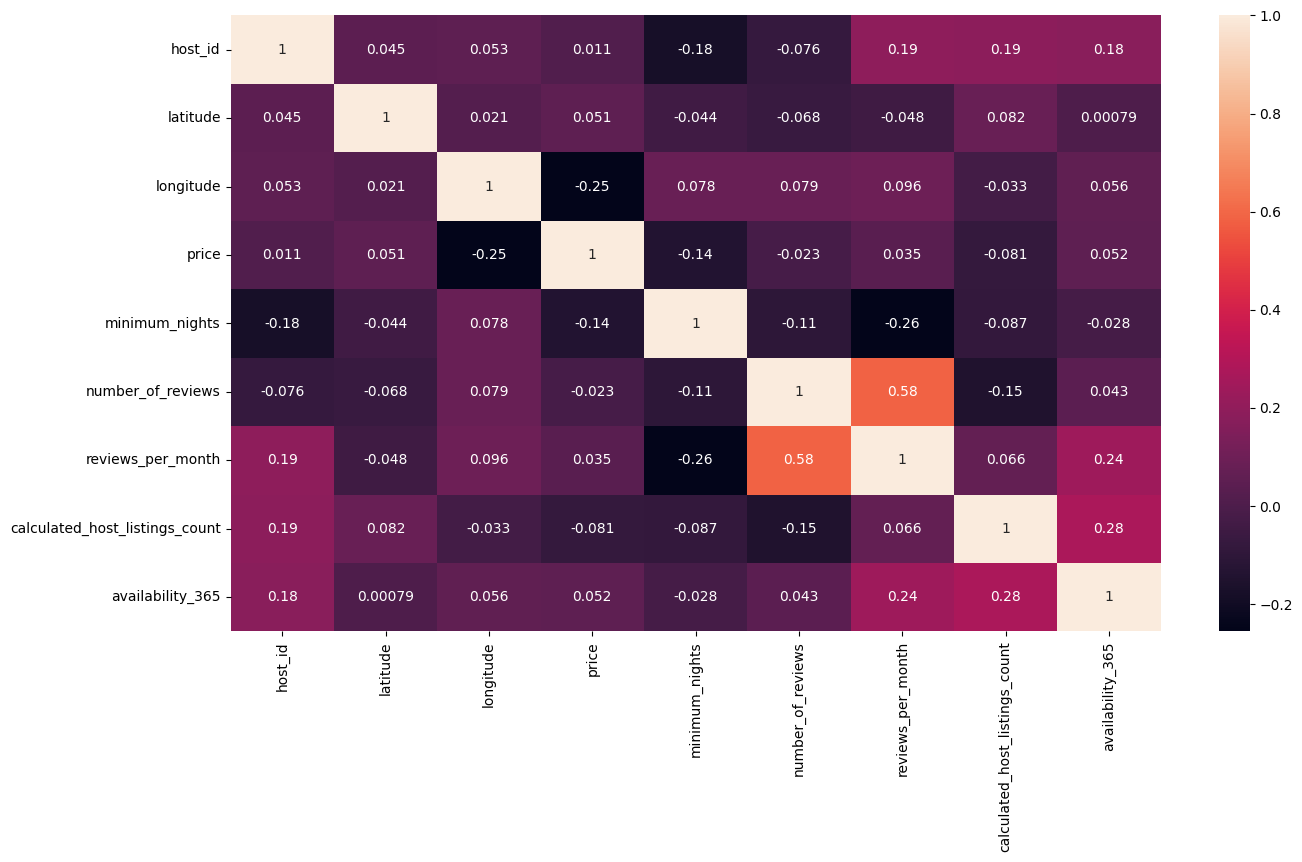

In [ ]:
corr = numeric_df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

Plot all Neighbourhood Group

Text(0.5, 1.0, 'Neighbourhood Group')

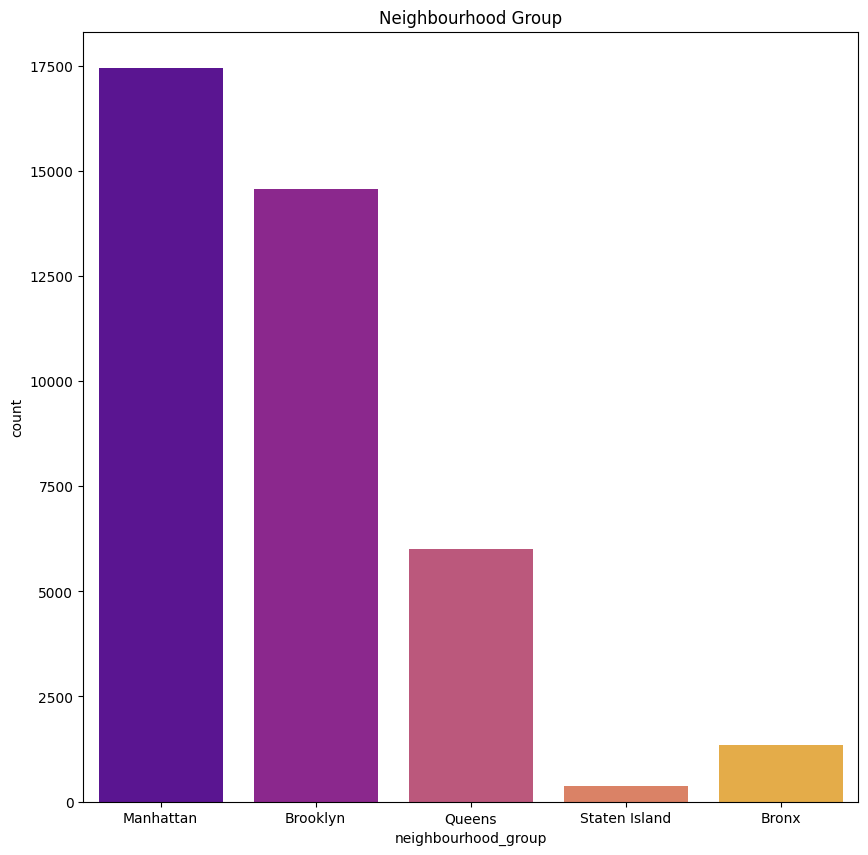

In [ ]:
sns.countplot(x='neighbourhood_group', data=df2024_01, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

Neighbourhood

Text(0.5, 1.0, 'Neighbourhood')

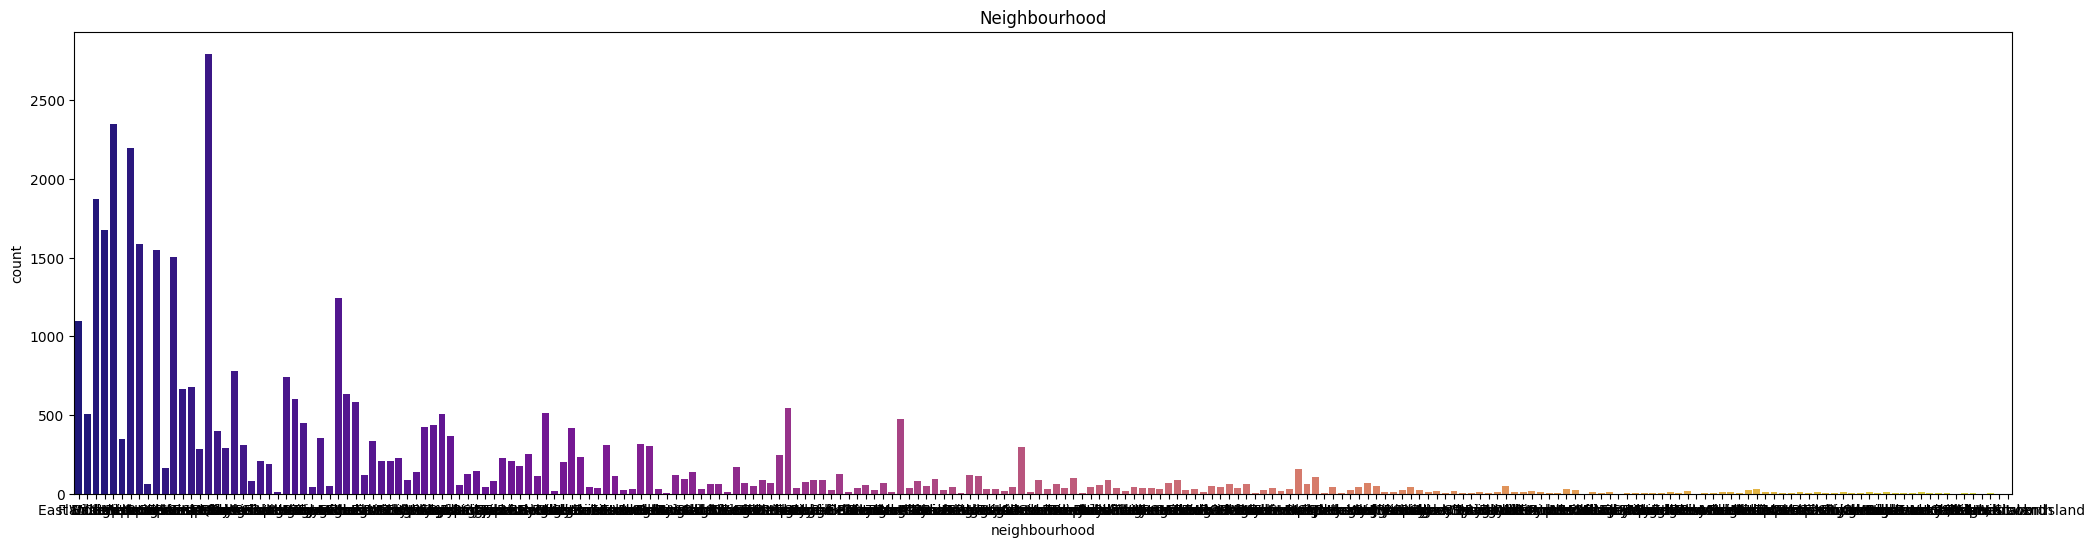

In [ ]:
sns.countplot(x='neighbourhood', data=df2024_01, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')


In [ ]:
df2024_01['neighbourhood'] = df2024_01['neighbourhood'].astype(str)

Room Type

Text(0.5, 1.0, 'Restaurants delivering online or Not')

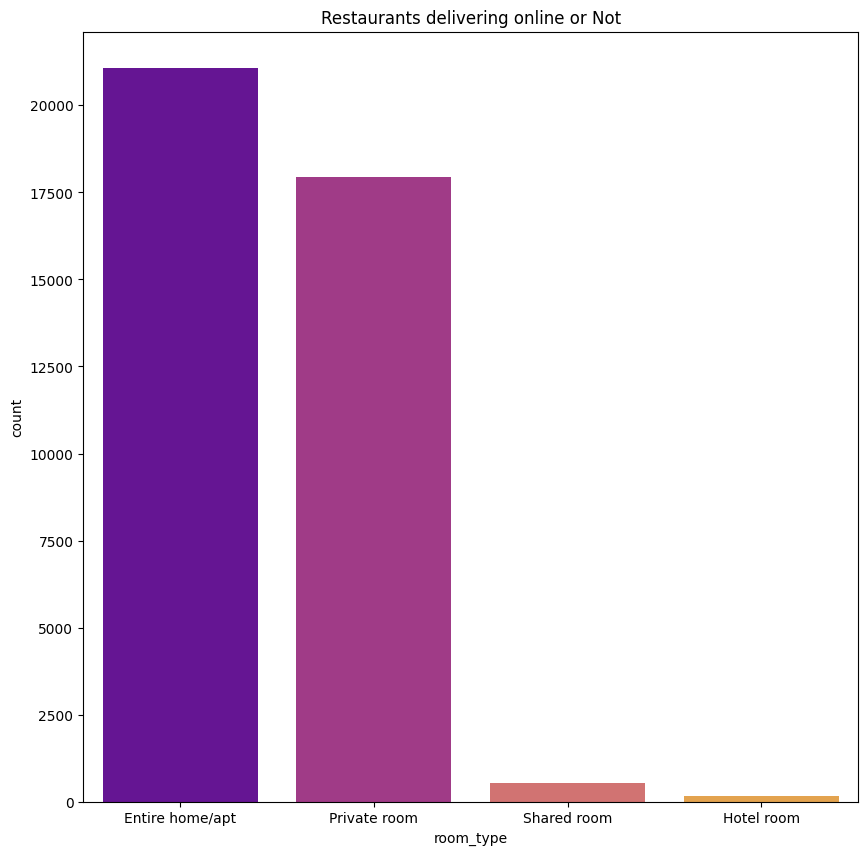

In [ ]:
#Restaurants delivering Online or not
sns.countplot(x='room_type', data=df2024_01, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

Relation between neighbourgroup and Availability of Room¶


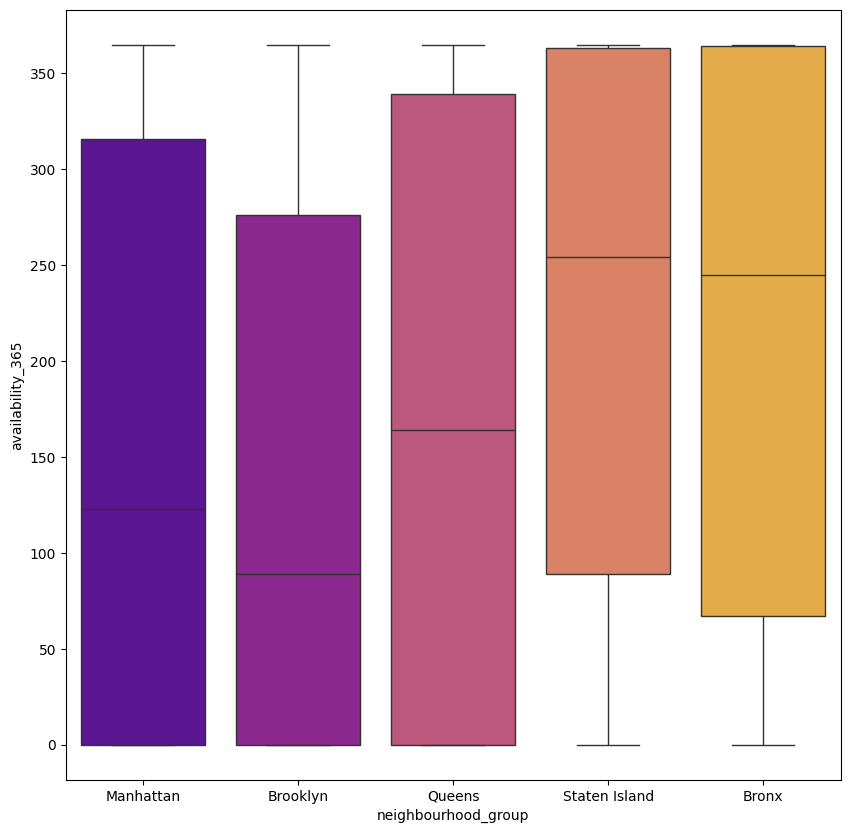

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df2024_01, x='neighbourhood_group',y='availability_365',palette='plasma')

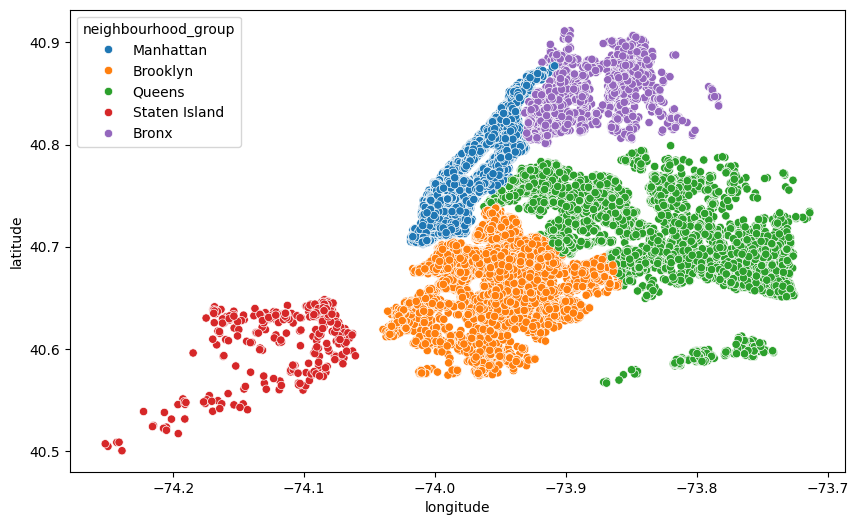

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df2024_01['longitude'], y=df2024_01['latitude'], hue=df2024_01['neighbourhood_group'])
plt.ioff()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df2024_01['longitude'], y=df2024_01['latitude'], hue=df2024_01['availability_365'])
plt.ioff()

In [ ]:
df2024_01
#发现availability_365数据有问题

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,5448955,Manhattan,East Village,40.731790,-73.986790,Entire home/apt,NaN,30,15,0.20,1,0
1,83422715,Brooklyn,Flatbush,40.653750,-73.955020,Entire home/apt,289.0,30,0,NaN,1,365
2,43719554,Manhattan,Harlem,40.824400,-73.945980,Private room,NaN,30,0,NaN,1,0
3,5925222,Brooklyn,Bushwick,40.690200,-73.917820,Entire home/apt,NaN,30,1,0.01,1,0
4,268631641,Manhattan,East Village,40.723850,-73.976950,Private room,NaN,30,1,0.02,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
39714,3237504,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,30,56,0.48,1,0
39715,304317395,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,30,60,2.09,1,0
39716,51678353,Manhattan,West Village,40.733170,-74.006080,Private room,NaN,30,2,0.02,1,0
39717,163083101,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,30,7,0.91,1,363


## Time Series

In [10]:
import matplotlib.pyplot as plt

In [11]:
print(df.columns)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [12]:
# Convert 'last_review' column to datetime type
df['last_review'] = pd.to_datetime(df['last_review'])

# Set 'last_review' as index
df.set_index('last_review', inplace=True)


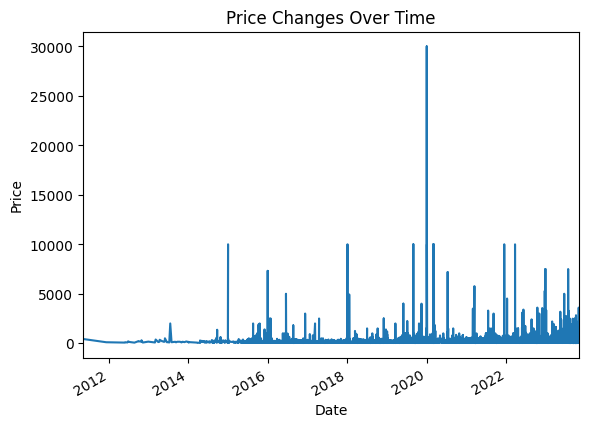

In [13]:
# Plot price changes over time
df['price'].plot()
plt.title('Price Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

# Set the range of the x-axis to the minimum and maximum dates of the dataset
plt.xlim(df.index.min(), df.index.max())

plt.show()



In [14]:
# Confirm whether 'last_review' is a column of DataFrame
if 'last_review' in df.columns:
    # If 'last_review' is a column, remove NaT by column
    df.dropna(subset=['last_review'], inplace=True)
    # Convert 'last_review' column to DatetimeIndex
    df['last_review'] = pd.to_datetime(df['last_review'])
    df.set_index('last_review', inplace=True)
else:
    # If 'last_review' is already an index
    df.index = pd.to_datetime(df.index)  # Make sure the index is of DatetimeIndex type
    df = df[~df.index.isna()]  # Delete rows with index NaT

# Aggregate duplicate date data
if df.index.duplicated().any():
    df = df.groupby(df.index).agg({'price': 'mean'})  # Aggregate using average of prices

# Try setting it to daily frequency
df = df.asfreq('D', method='pad')  # Use forward padding to handle missing dates

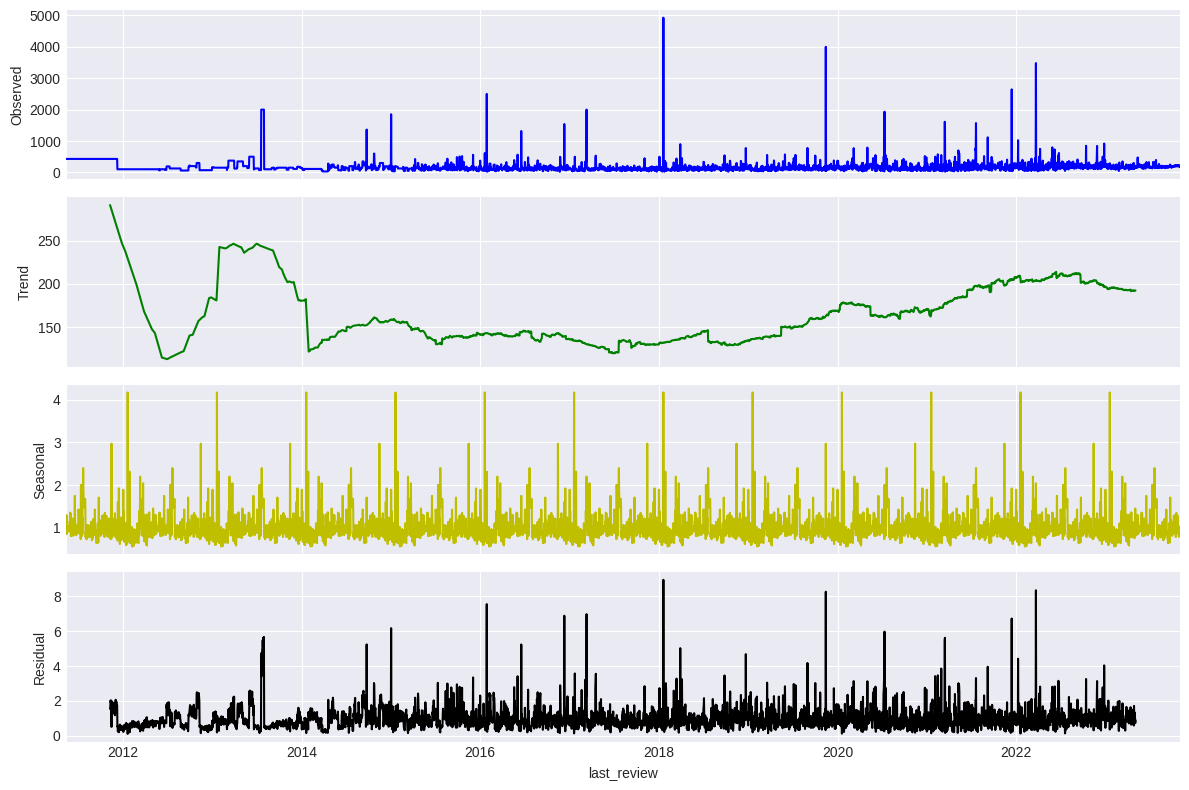

In [15]:
# Try a multiplicative model for seasonal decomposition
result = seasonal_decompose(df['price'], model='multiplicative', period=365)

# Draw an exploded diagram using the method
plt.style.use('seaborn-darkgrid')
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(12, 8))

result.observed.plot(ax=axes[0], legend=False, color='b')
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False, color = 'y')
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False, color='k')
axes[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()


In [ ]:
from pmdarima import auto_arima
auto_model = auto_arima(df['price'], seasonal=True, m=12, d=1, D=1,
                        max_p=3, max_q=3, max_P=3, max_Q=3,
                        trace=True, error_action='ignore', suppress_warnings=True)
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=83.73 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=65061.878, Time=0.23 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=62600.135, Time=3.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=9.56 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=64006.130, Time=0.29 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=62050.980, Time=8.20 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=61697.329, Time=17.63 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=61.32 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=36.05 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=62798.337, Time=5.12 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=61335.314, Time=26.32 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=61694.226, Time=14.32 sec
 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=87.13 sec


In [30]:
# Check for stationarity
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df['price'])

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

d_value = 1 if adf_test[1] < 0.05 else 2

sarimax_model = SARIMAX(df_subset['price'],
                        order=(2, d_value, 0),
                        seasonal_order=(3, 1, 0, 12),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit()

forecast_steps = 180
forecast = sarimax_result.get_forecast(steps=forecast_steps)


ADF Statistic: -15.746171
p-value: 0.000000


### Forecast for the next 180 days, based on data from 2012 to new date

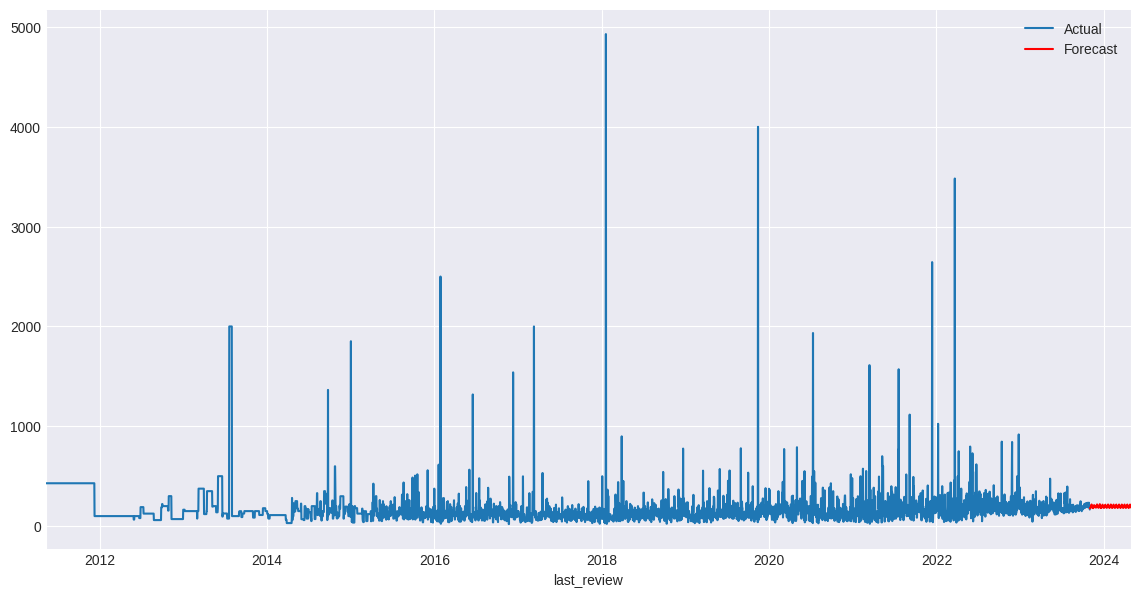

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

model = SARIMAX(df['price'],
                order=(2, 0, 0),
                seasonal_order=(3, 1, 0, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit()
forecast_result = model_fit.get_forecast(steps=180)

df['price'].plot(label='Actual', figsize=(14, 7))
forecast.plot(label='Forecast', color='red')
plt.legend()
plt.show()

Forecasted Prices for Next 180 Days:
2023-11-02    176.793905
2023-11-03    180.255685
2023-11-04    185.538140
2023-11-05    184.499734
2023-11-06    190.584576
                 ...    
2024-04-25    215.660295
2024-04-26    200.449821
2024-04-27    198.031452
2024-04-28    196.848864
2024-04-29    186.145599
Freq: D, Name: predicted_mean, Length: 180, dtype: float64

95% Confidence Intervals for the Forecast:
            lower price  upper price
2023-11-02          0.0   556.368787
2023-11-03          0.0   572.101026
2023-11-04          0.0   588.761824
2023-11-05          0.0   589.943027
2023-11-06          0.0   597.024385
...                 ...          ...
2024-04-25          0.0   916.969678
2024-04-26          0.0   901.760166
2024-04-27          0.0   899.342112
2024-04-28          0.0   898.159630
2024-04-29          0.0   887.456400

[180 rows x 2 columns]


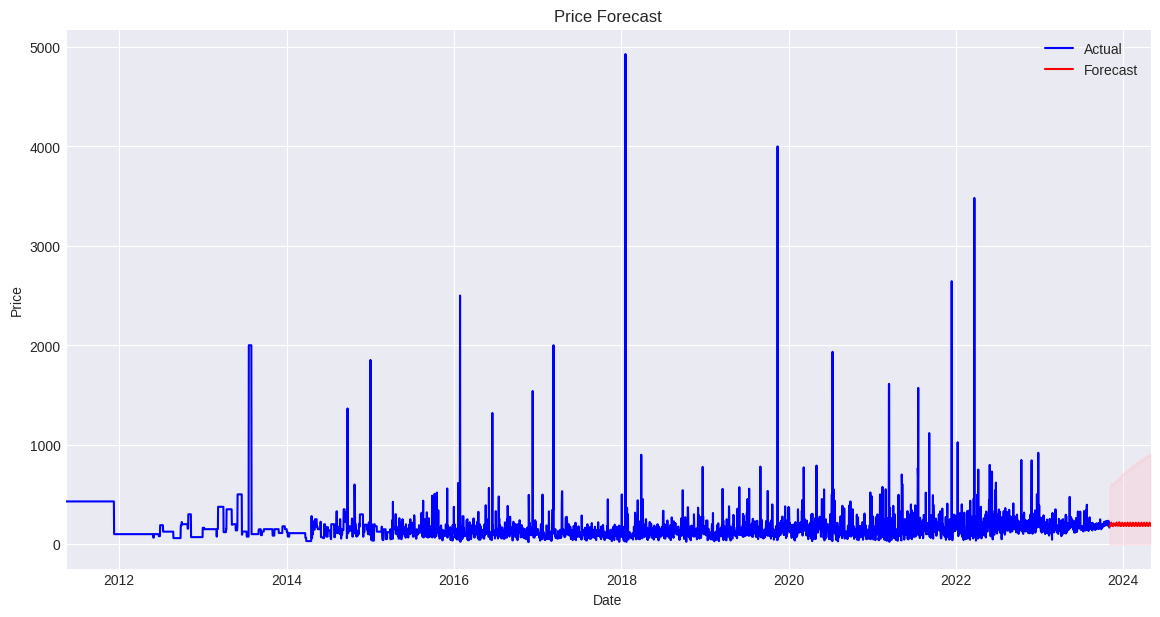

In [47]:
forecast_values1 = forecast_result.predicted_mean
forecast_ci1 = forecast_result.conf_int()

forecast_ci1['lower price'] = forecast_ci1.iloc[:, 0].clip(lower=0)
forecast_ci1['upper price'] = forecast_ci1.iloc[:, 1]

print("Forecasted Prices for Next 180 Days:")
print(forecast_values1)

print("\n95% Confidence Intervals for the Forecast:")
print(forecast_ci1)

plt.figure(figsize=(14, 7))
df['price'].plot(label='Actual', color='blue')
forecast_values1.plot(label='Forecast', color='red')
plt.fill_between(forecast_values1.index,
                 forecast_ci1['lower price'],
                 forecast_ci1['upper price'], color='pink', alpha=0.3)
plt.title('Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


### Forecast for the next 180 days, based on data from 2022 to new date

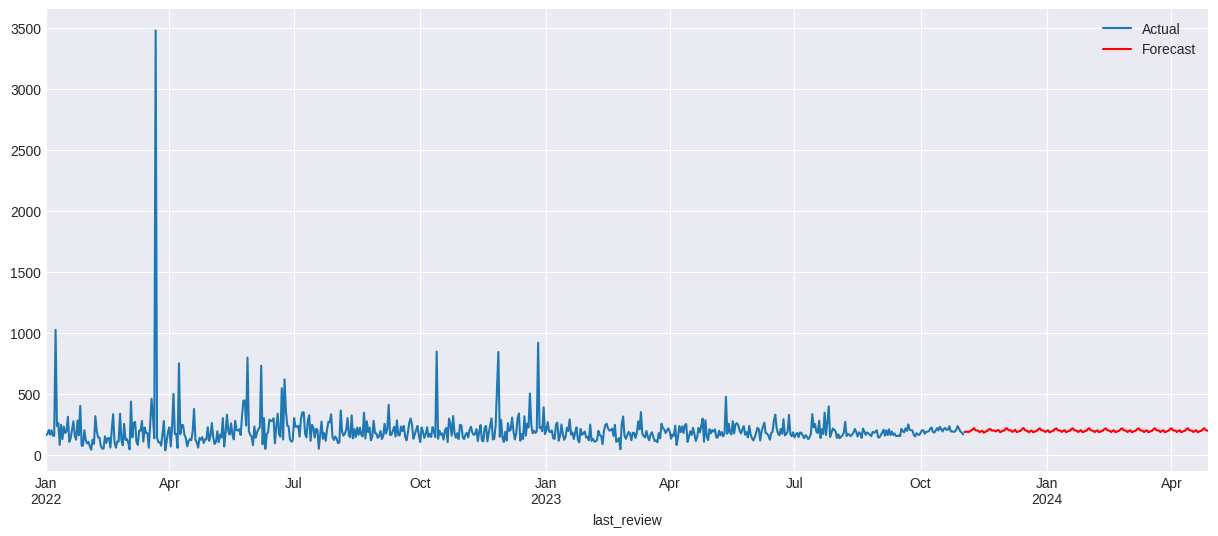

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

start_date = '2022-01'
end_date = df.index[-1]
mask = (df.index >= start_date) & (df.index <= end_date)
df_subset = df.loc[mask]

sarimax_model = SARIMAX(df_subset['price'],
                        order=(2, 0, 0),
                        seasonal_order=(3, 1, 0, 12),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit()
forecast_steps = 180
forecast = sarimax_result.get_forecast(steps=forecast_steps)

forecast_values = forecast.predicted_mean

last_known_date = df_subset.index[-1]
forecast_dates = pd.date_range(start=last_known_date, periods=forecast_steps, freq='D')

forecast_series = pd.Series(forecast_values, index=forecast_dates)

df_subset['price'].plot(label='Actual', figsize=(15, 6))
forecast_series.plot(label='Forecast', color='red')
plt.legend()
plt.show()


Forecasted Prices for Next 180:
2023-11-02    185.183593
2023-11-03    189.597507
2023-11-04    187.029997
2023-11-05    186.463891
2023-11-06    191.551713
Freq: D, Name: predicted_mean, dtype: float64

95% Confidence Intervals for the Forecast:
            lower price  upper price
2023-11-02          0.0   546.833376
2023-11-03          0.0   551.279577
2023-11-04          0.0   549.093426
2023-11-05          0.0   548.527591
2023-11-06          0.0   553.616224


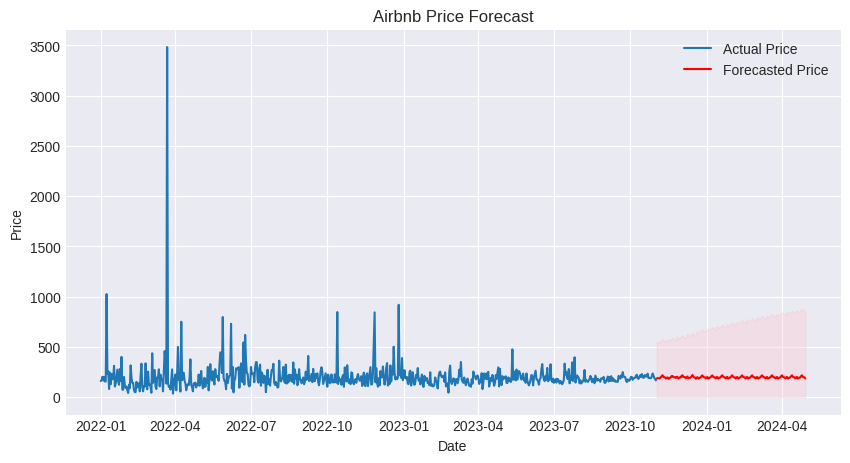

In [35]:
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

forecast_ci['lower price'] = forecast_ci['lower price'].clip(lower=0)
forecast_ci['upper price'] = forecast_ci['upper price'].clip(lower=0)

print("Forecasted Prices for Next 180:")
print(forecast_values.head())

print("\n95% Confidence Intervals for the Forecast:")
print(forecast_ci.head())

plt.figure(figsize=(10,5))
plt.plot(df_subset['price'], label='Actual Price')
plt.plot(forecast_values, label='Forecasted Price', color='red')
plt.fill_between(forecast_values.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Airbnb Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### PCA...